In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
import math
import sys

class LogisticRegression():
    def __init__(self):
        self.features = None
        self.weights = None
        self.targets = None
        self.preds = None
    
    def fit(self, features, targets, num_steps=300000, learning_rate=5e-5, add_intercept = False, debug=True):
        self.features = features.copy()
        self.targets = targets.copy()
        self.weights = self.gradient_descent(self.features, self.targets,num_steps=num_steps, learning_rate=learning_rate, add_intercept=add_intercept, debug=debug)
        
    def weights(self):
        return self.weights
    
    def predict(self, test_data):
        if test_data is None:
            raise ValueError('test_data should not be None')
        final_scores = np.dot(test_data, lgr.weights)
        self.preds = np.round(self.sigmoid(final_scores))
        return self.preds
    
    # Linking function 
    def sigmoid(self, scores):
        return .5 * (1 + np.tanh(.5 * scores))
    
    # cost given the weights 
    def currCost(self):
        if self.features is None or self.targets is None or self.weights is None:
            return math.inf
        return self.cost(self.features, self.targets, self.weights)
    
    def gradient_descent(self, features, targets, num_steps=300000, learning_rate=5e-5, add_intercept = False, debug=False):
        if features is None or targets is None:
            raise ValueError('either features or targets is None')
        if num_steps < 1:
            num_steps = 100
        if learning_rate < 0:
            learning_rate = 5e-6
        if add_intercept:
            intercept = np.ones((features.shape[0], 1))
            self.features = features = np.hstack((intercept, features))
        
        # initialize weights
        weights = np.zeros(features.shape[1])

        costs = []
        for step in range(num_steps):
            # Scores can go from -inf to +inf
            scores = np.dot(features, weights)
            # Link scores to probability range 
            predictions = self.sigmoid(scores)
    
            # compute error and gradient and update weights
            error = targets - predictions
            gradient = np.dot(features.T, error)
            weights += learning_rate * gradient
        
            # For debugging
            if debug and step % 1 == 0:
                cost = self.cost(features, targets, weights)
                costs.append(cost)
        
        if debug:
            plt.plot(costs)
            plt.show()
        return weights
    
    def cost(self,features, targets, weights):
        scores = np.dot(features, weights)
        cost = np.sum(targets*scores - np.log(1 + np.exp(scores)))
        return -cost

In [29]:
# Sample data generation code taken from 
# https://beckernick.github.io/logistic-regression-from-scratch/
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

features = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

In [30]:
lgr = LogisticRegression()
weights = lgr.fit(features, labels, learning_rate=5e-5, num_steps=20000, add_intercept=True, debug=False)

In [31]:
cost = lgr.currCost()

In [32]:
cost

142.96518112122521

In [33]:
# Comparing classifier against sklearn's logistic regression 
import sklearn.linear_model

clf = sklearn.linear_model.LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(features, labels)

print(clf.intercept_, clf.coef_)
print(lgr.weights)

[-13.99400797] [[-5.02712572  8.23286799]]
[-12.24129164  -4.40508342   7.22264204]


In [34]:
data_with_intercept = np.hstack((np.ones((features.shape[0], 1)),
                                 features))
preds = lgr.predict(data_with_intercept)
print('Accuracy {0}'.format((preds == labels).sum().astype(float) / len(preds)))
print('Accuracy {0}'.format(clf.score(features, labels)))

Accuracy 0.9947
Accuracy 0.9948


In [35]:
def accuracy(labels, predictions):
    return (preds == labels).sum().astype(float) / len(preds)

def add_intercept(features):
    return np.hstack((np.ones((features.shape[0], 1)),
                                 features))

In [36]:
# Workng on CIFAR-10 data set
import skimage.io
import glob
imageFileNames = glob.glob('data/train/*.png')
testImageFileNames = imageFileNames[:10000]
trainImageFileNames = imageFileNames[10000:]

images = []
for imgName in trainImageFileNames:
    images.append(skimage.io.imread(imgName))

images = np.array(images)

testImages = []
for imgName in testImageFileNames:
    testImages.append(skimage.io.imread(imgName))

testImages = np.array(testImages)

In [37]:
images = np.reshape(images, (len(images),(32*32*3)))
testImages = np.reshape(testImages, (len(testImages),(32*32*3)))

In [38]:
images.shape

(40000, 3072)

In [39]:
train_labels = pd.read_csv('data/trainLabels.csv')[10000:]
test_labels = pd.read_csv('data/trainLabels.csv')[:10000]

In [40]:
train_labels.head()

,id,label
10000,10001,automobile
10001,10002,frog
10002,10003,frog
10003,10004,ship
10004,10005,ship


In [41]:
# Classifying if image is a frog or not
is_frog_labels = train_labels['label'] == 'frog'
is_frog_labels_test = test_labels['label'] == 'frog'

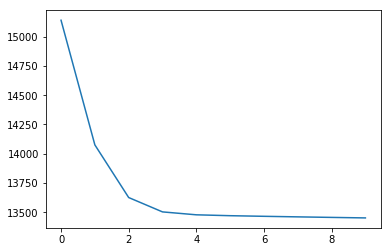

In [42]:
# Scale the pixels to prevent overflow 
images = np.divide(images, 255)
testImages = np.divide(testImages, 255)

lgr = LogisticRegression()
lgr.fit(images, is_frog_labels, learning_rate=3e-7, num_steps=10, add_intercept=True)

In [43]:
import sklearn.linear_model

In [44]:
clf = sklearn.linear_model.LogisticRegression(fit_intercept=True, C = 1e15, verbose=1, max_iter=1)

In [45]:
clf.fit(images, is_frog_labels)

[LibLinear]

/home/daniel/mlenv/lib/python3.5/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=1, warm_start=False)

In [46]:
# The weights are pretty close! 
print(clf.intercept_, clf.coef_) 
print(lgr.weights)

[-0.00215695] [[-0.0011113  -0.00115595 -0.00112589 ..., -0.00107223 -0.00106458
  -0.00096823]]
[-0.0044583  -0.00146619 -0.00150019 ..., -0.0015987  -0.00153975
 -0.00129167]


In [47]:
test_images_with_intercept = add_intercept(testImages)
preds = lgr.predict(test_images_with_intercept)
print('My accuracy: ', accuracy(is_frog_labels_test, preds))
print('Scikit-learn accuracy', clf.score(testImages, is_frog_labels_test))

My accuracy:  0.897
Scikit-learn accuracy 0.897


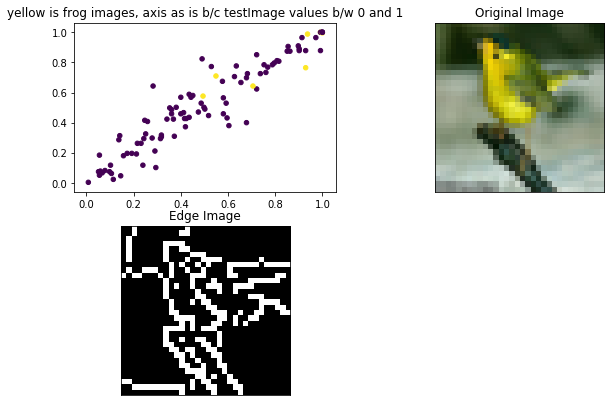

In [53]:
# plotting the images colored by class
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0, top=1, left=0, right=1)

plt.subplot(321)
plt.title('yellow is frog images, axis as is b/c testImage values b/w 0 and 1')
plt.scatter(testImages[:100, 0], testImages[:100, 1], marker='o', c=is_frog_labels_test[:100],
            s=20, edgecolor='face')



import cv2

img = plt.imread('data/train/6548.png',cv2.IMREAD_UNCHANGED)
edges = cv2.Canny(img,100,200)

plt.subplot(322),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()